In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv("data/predictive_maintenance_dataset.csv")
df.head(5)

,timestamp,vibration,temperature,pressure,torque,load,failure
0,2025-01-01 00:00:00,78.907663,76.169380,100.372195,39.139461,62.438004,0
1,2025-01-01 00:01:00,72.557878,76.021108,103.356157,39.804065,61.983265,1
2,2025-01-01 00:02:00,80.417407,69.309962,101.021104,40.385769,53.444361,0
3,2025-01-01 00:03:00,89.170820,76.637727,106.683497,45.681169,64.057090,0
4,2025-01-01 00:04:00,71.598988,81.952324,115.377581,35.516696,49.569421,0


In [3]:
print("shaape:\n",df.shape)
print("\ndata type:\n",df.dtypes)
print("\n missing values:\n",df.isnull().sum())
print("\n duplicate value:\n",df.duplicated().sum())
print("\ninfo:\n",df.info())
print("\ndescribe:\n",df.describe(include='all'))

shaape:
 (5000, 7)

data type:
 timestamp       object
vibration      float64
temperature    float64
pressure       float64
torque         float64
load           float64
failure          int64
dtype: object

 missing values:
 timestamp      0
vibration      0
temperature    0
pressure       0
torque         0
load           0
failure        0
dtype: int64

 duplicate value:
 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5000 non-null   object 
 1   vibration    5000 non-null   float64
 2   temperature  5000 non-null   float64
 3   pressure     5000 non-null   float64
 4   torque       5000 non-null   float64
 5   load         5000 non-null   float64
 6   failure      5000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 273.6+ KB

info:
 None

describe:
                   timestamp    vibration  tempe

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp']) #convert to the date and time from object


In [5]:
df['year'] = df['timestamp'].dt.year       
df['month'] = df['timestamp'].dt.month     
df['day'] = df['timestamp'].dt.day 
df['hour'] = df['timestamp'].dt.hour


In [6]:
df.head()

,timestamp,vibration,temperature,pressure,torque,load,failure,year,month,day,hour
0,2025-01-01 00:00:00,78.907663,76.169380,100.372195,39.139461,62.438004,0,2025,1,1,0
1,2025-01-01 00:01:00,72.557878,76.021108,103.356157,39.804065,61.983265,1,2025,1,1,0
2,2025-01-01 00:02:00,80.417407,69.309962,101.021104,40.385769,53.444361,0,2025,1,1,0
3,2025-01-01 00:03:00,89.170820,76.637727,106.683497,45.681169,64.057090,0,2025,1,1,0
4,2025-01-01 00:04:00,71.598988,81.952324,115.377581,35.516696,49.569421,0,2025,1,1,0


In [7]:
df.dtypes

timestamp      datetime64[ns]
vibration             float64
temperature           float64
pressure              float64
torque                float64
load                  float64
failure                 int64
year                    int32
month                   int32
day                     int32
hour                    int32
dtype: object

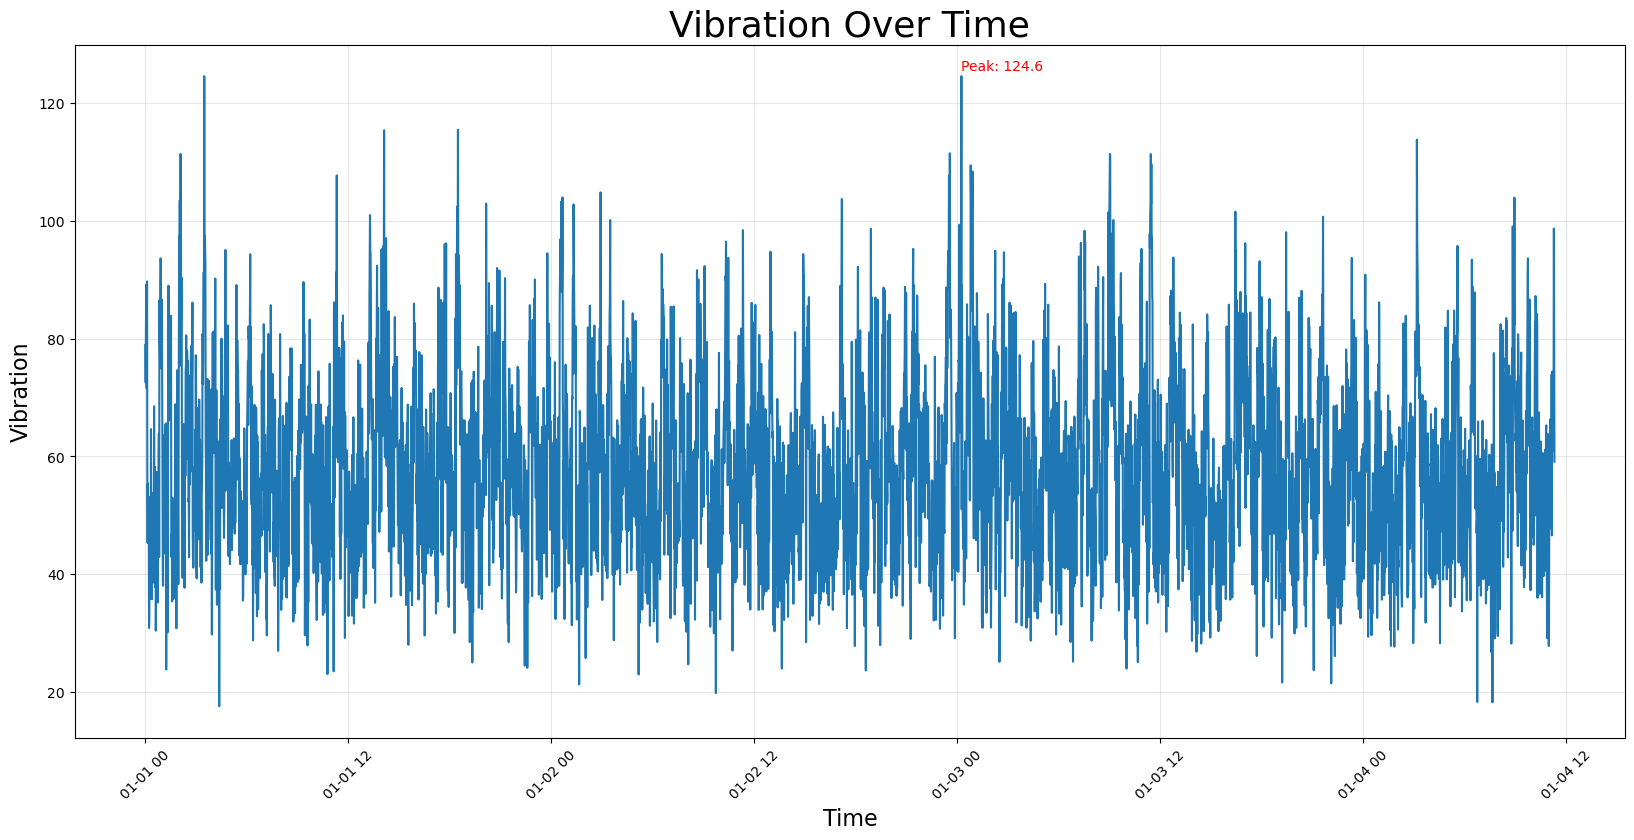




------------------------------------------------------------------------------------------------------------------------------------------------------





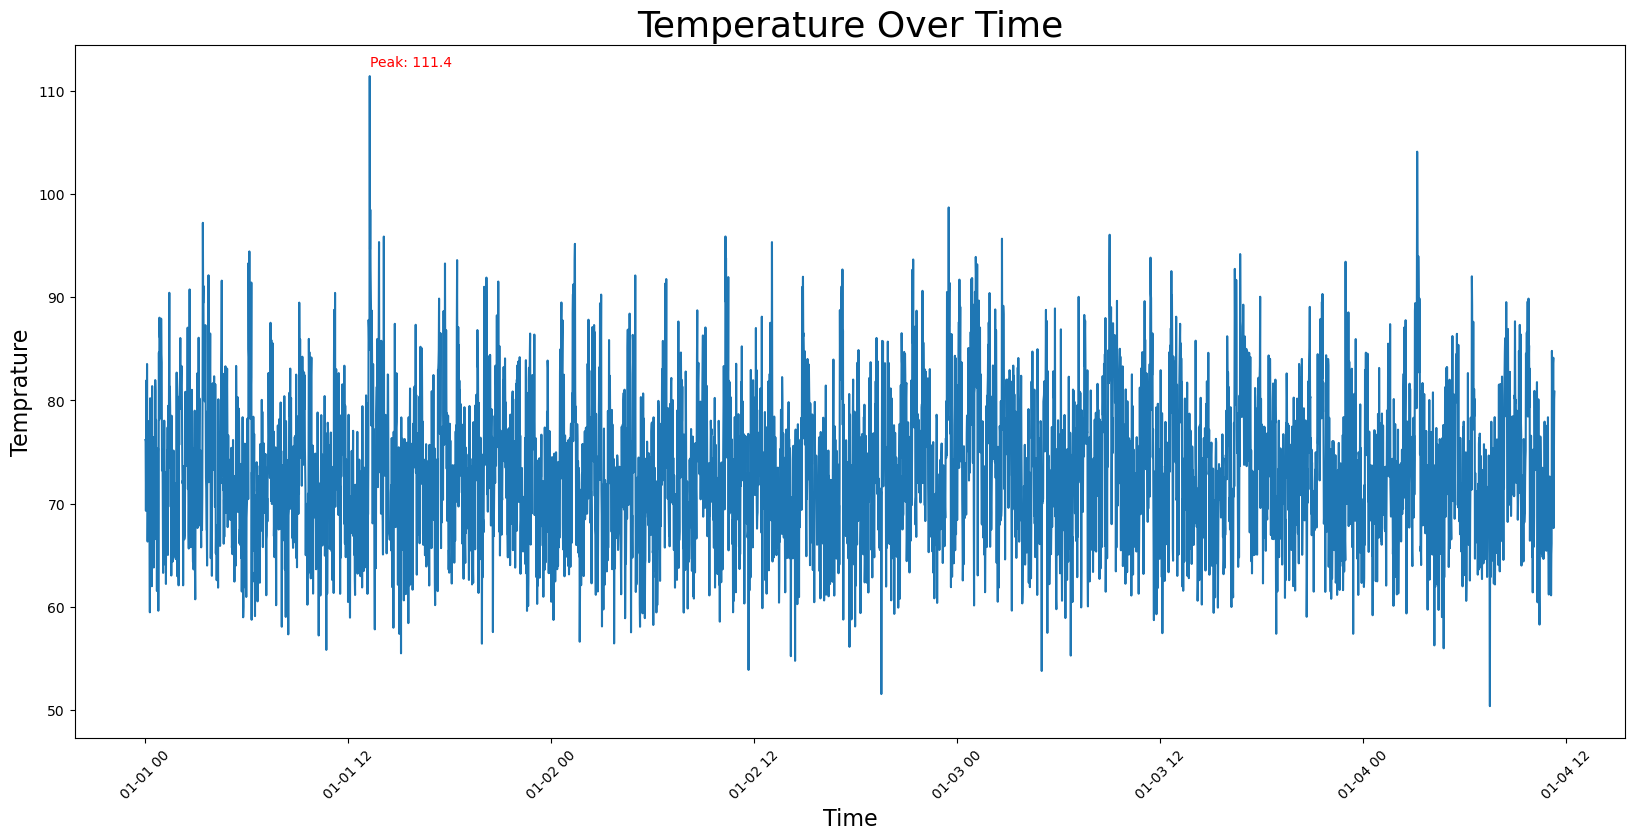




------------------------------------------------------------------------------------------------------------------------------------------------------





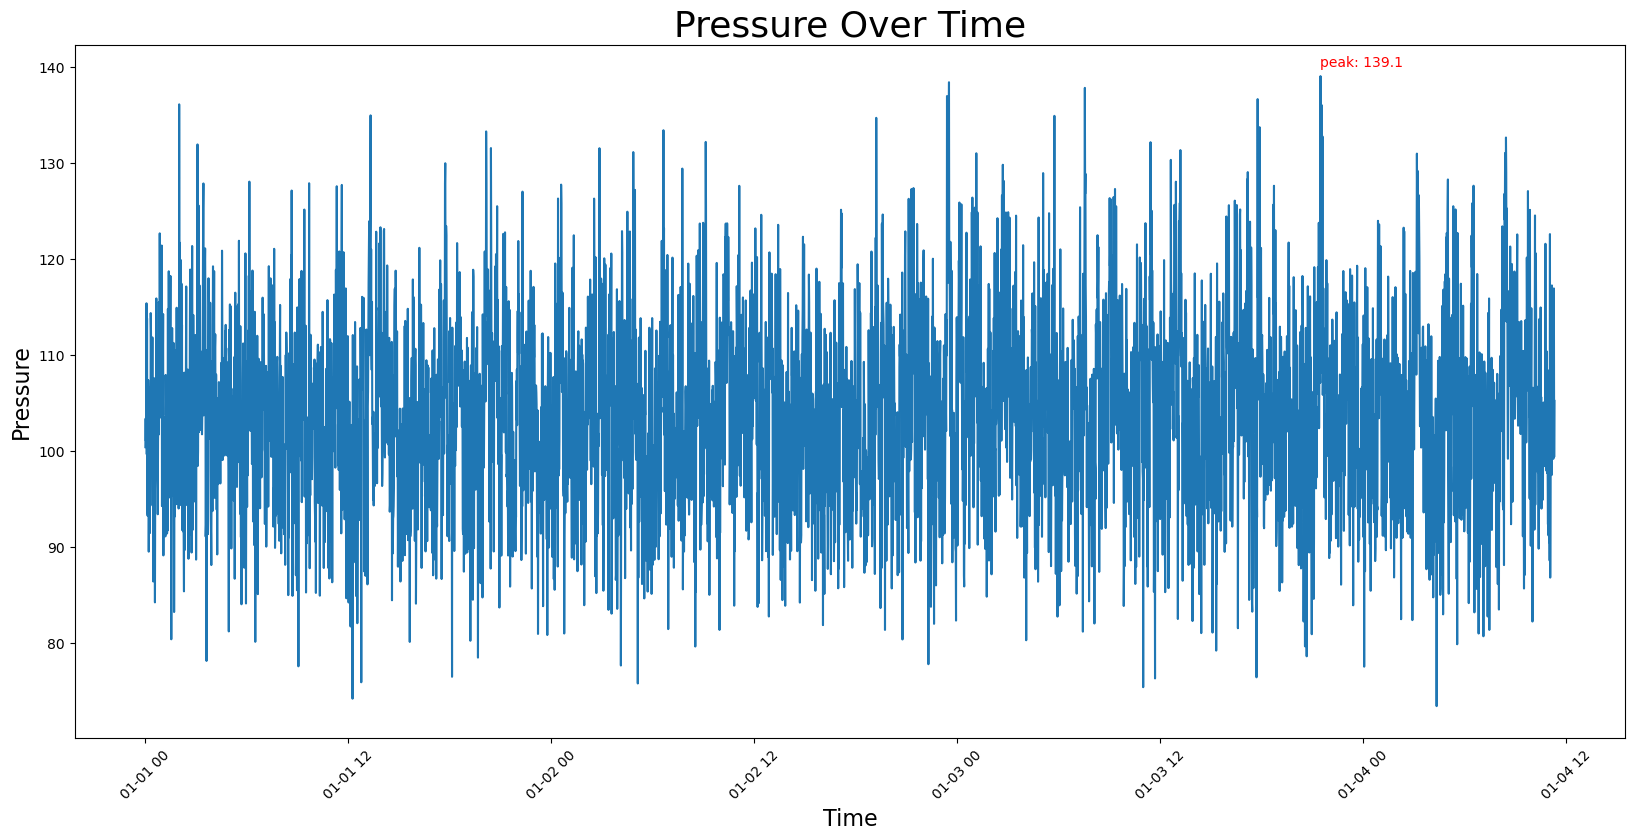




------------------------------------------------------------------------------------------------------------------------------------------------------





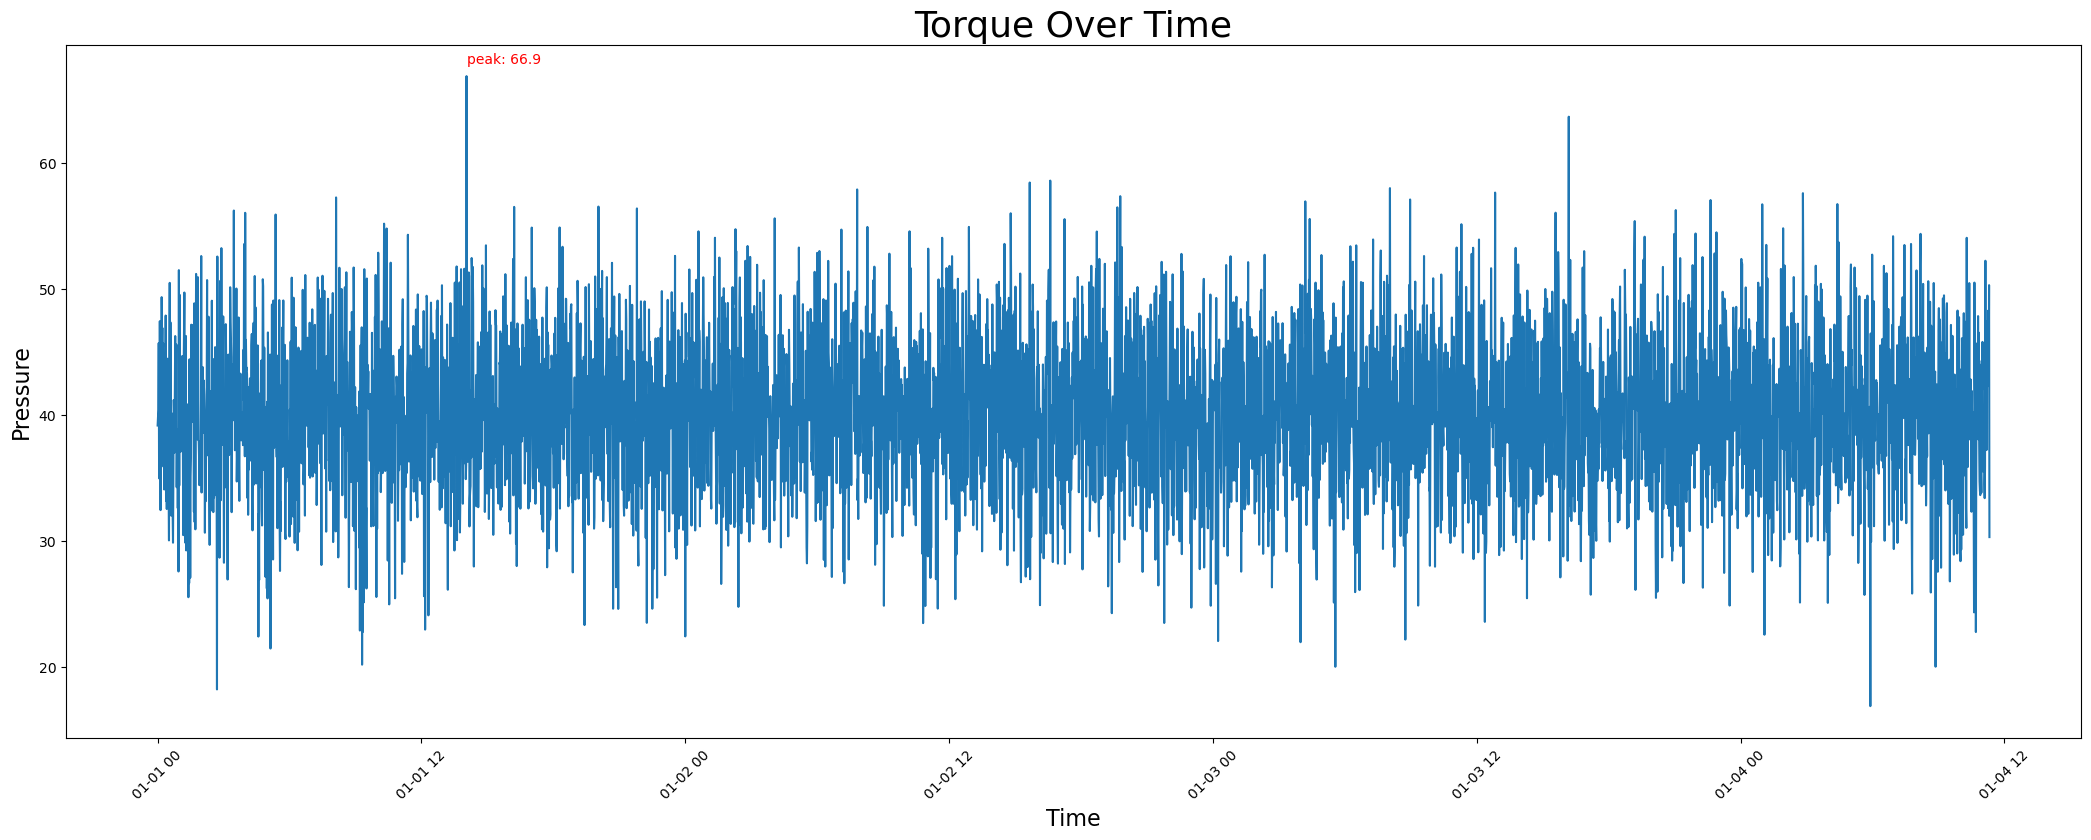




------------------------------------------------------------------------------------------------------------------------------------------------------





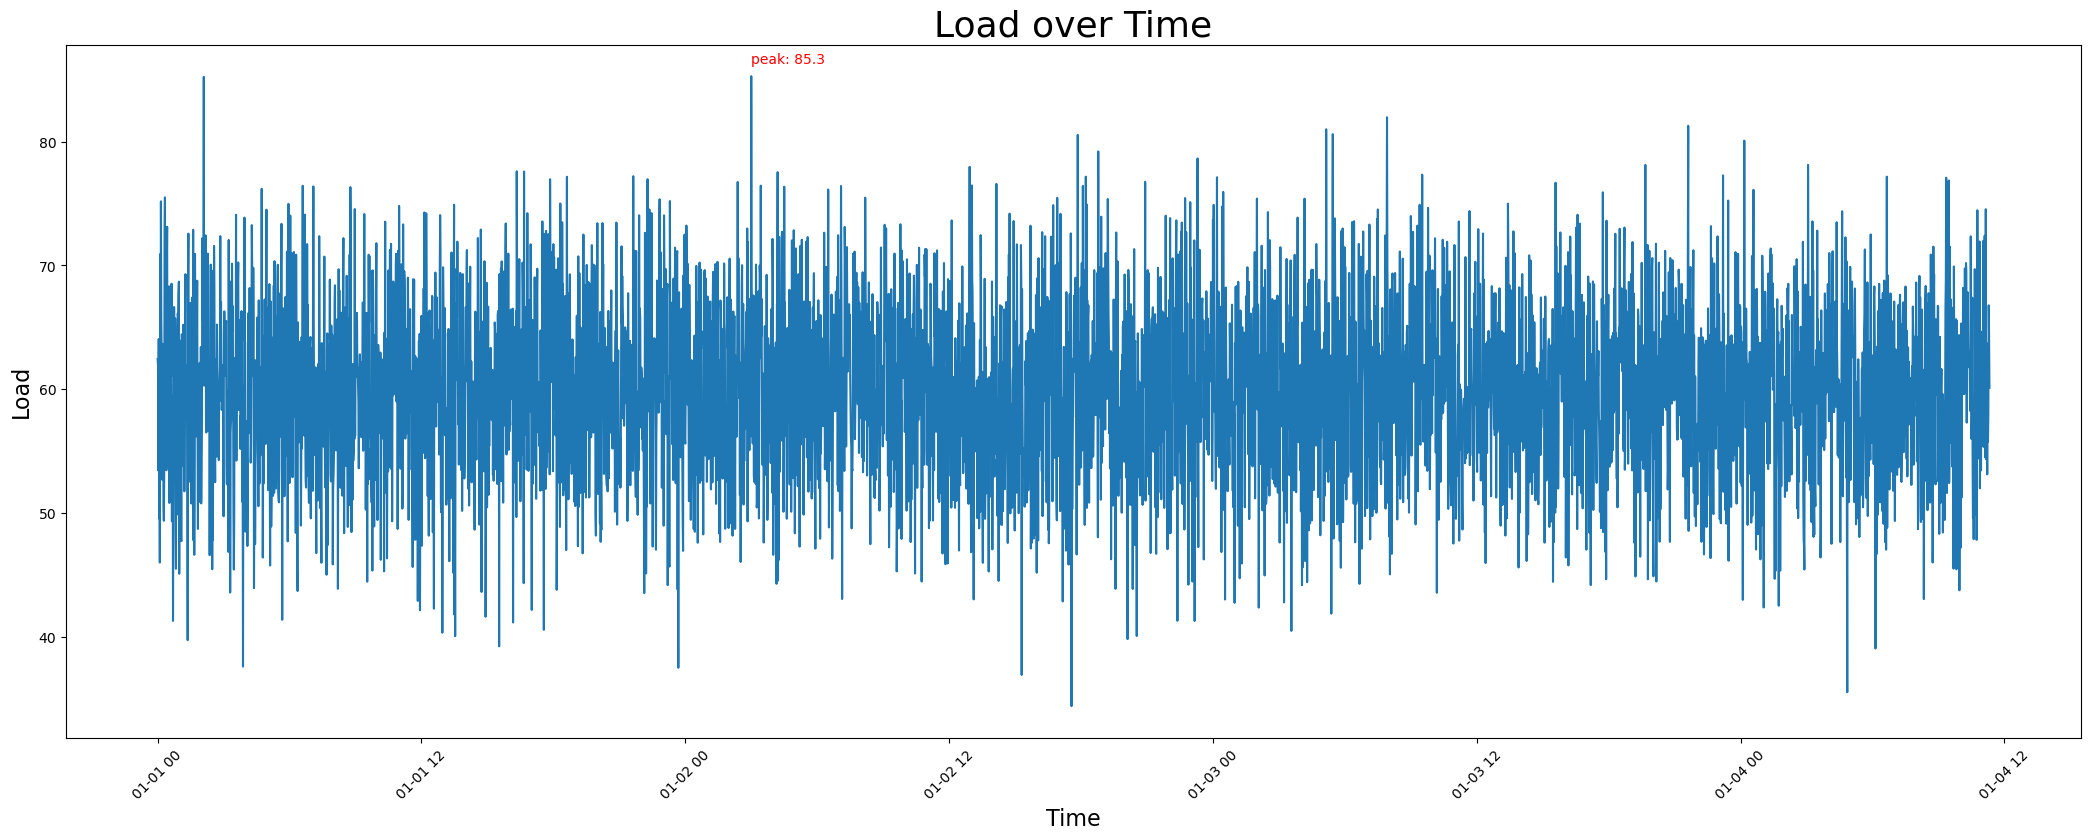




------------------------------------------------------------------------------------------------------------------------------------------------------





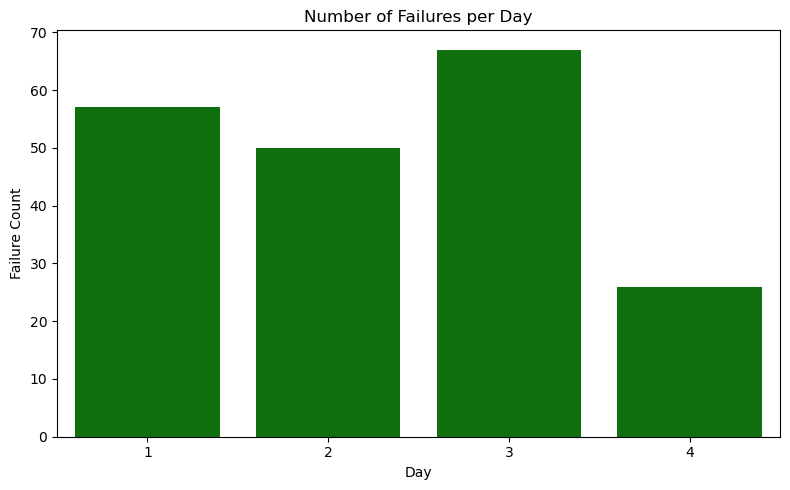

In [8]:
# bivariante plots 

import matplotlib.pyplot as plt
import seaborn as sns

#Vibration Over Time

plt.figure(figsize=(20, 9))  

sns.lineplot(data=df,x="timestamp" ,y='vibration')  

plt.title("Vibration Over Time", fontsize=26)
plt.xlabel("Time",fontsize=16)
plt.ylabel("Vibration",fontsize=16)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

peak = df.loc[df['vibration'].idxmax()]
plt.text(peak['timestamp'], peak['vibration'] + 1, f"Peak: {peak['vibration']:.1f}", color='red')

plt.savefig("Vibration Over Time")
plt.show()

# temperature Over Time

print("\n\n\n" + "-" * 150 + "\n\n\n")

plt.figure(figsize=(20,9))
sns.lineplot(data=df,x="timestamp",y="temperature")
plt.title("Temperature Over Time",fontsize=26)
plt.xlabel("Time",fontsize=16)
plt.ylabel("Temprature",fontsize=16)

plt.xticks(rotation=45)

peak = df.loc[df['temperature'].idxmax()]
plt.text(peak['timestamp'], peak['temperature'] + 1, f"Peak: {peak['temperature']:.1f}", color='red')

plt.savefig("Temperature Over Time")
plt.show()



# pressure Over Time

print("\n\n\n" + "-" * 150 + "\n\n\n")

plt.figure(figsize=(20,9))
sns.lineplot(data=df,x="timestamp",y="pressure")
plt.title("Pressure Over Time",fontsize=26)
plt.xlabel("Time",fontsize=16)
plt.ylabel("Pressure",fontsize=16)

plt.xticks(rotation=45)

peak= df.iloc[df["pressure"].idxmax()]
plt.text(peak["timestamp"],peak["pressure"] + 1, f"peak: {peak["pressure"]:.1f}",color='red')

plt.savefig("Pressure Over Time")
plt.show()


#torque over time

print("\n\n\n" + "-" * 150 + "\n\n\n")

plt.figure(figsize=(26,9))
sns.lineplot(data=df,x="timestamp",y="torque")
plt.title("Torque Over Time",fontsize=26)
plt.xlabel("Time",fontsize=16)
plt.ylabel("Pressure",fontsize=16)

plt.xticks(rotation=45)

peak =df.iloc[df["torque"].idxmax()]
plt.text(peak["timestamp"],peak["torque"] + 1, f"peak: {peak["torque"]:.1f}",color="red")

plt.savefig("Torque Over Time")
plt.show()


#Load over time

print("\n\n\n" + "-" * 150 + "\n\n\n")


plt.figure(figsize=(26,9))

sns.lineplot(data=df,x="timestamp",y="load")
plt.title("Load over Time",fontsize=26)
plt.xlabel("Time",fontsize=16)
plt.ylabel("Load",fontsize=16)

plt.xticks(rotation=45)

peak =df.iloc[df["load"].idxmax()]
plt.text(peak["timestamp"],peak["load"] + 1, f"peak: {peak["load"]:.1f}",color="red")

plt.savefig("Load Over Time")
plt.show()


#Faliures in a day

print("\n\n\n" + "-" * 150 + "\n\n\n")

df['FailureFlag'] = df['failure'] == 1
failures_only = df[df['FailureFlag']]
failures_by_day = failures_only['day'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=failures_by_day.index, y=failures_by_day.values, color='green')

plt.title("Number of Failures per Day")
plt.xlabel("Day")
plt.ylabel("Failure Count")
plt.tight_layout()

plt.savefig("Number of Failures per Day(bar)")
plt.show()

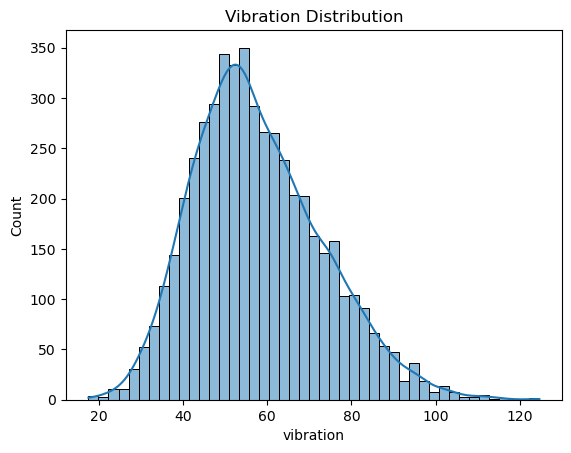




------------------------------------------------------------------------------------------------------------------------------------------------------





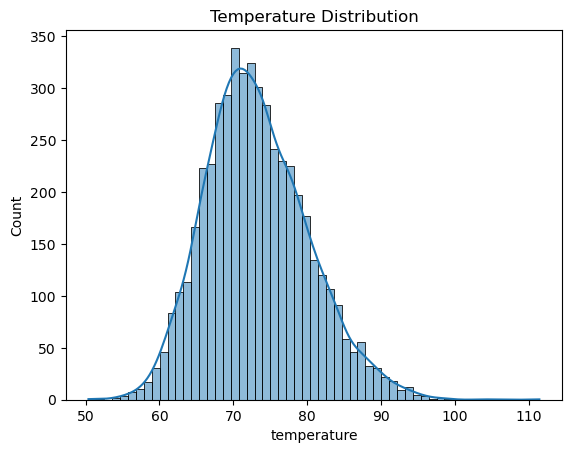




------------------------------------------------------------------------------------------------------------------------------------------------------





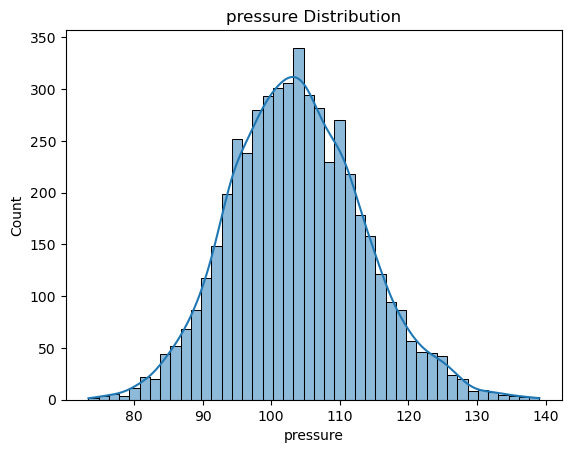




------------------------------------------------------------------------------------------------------------------------------------------------------





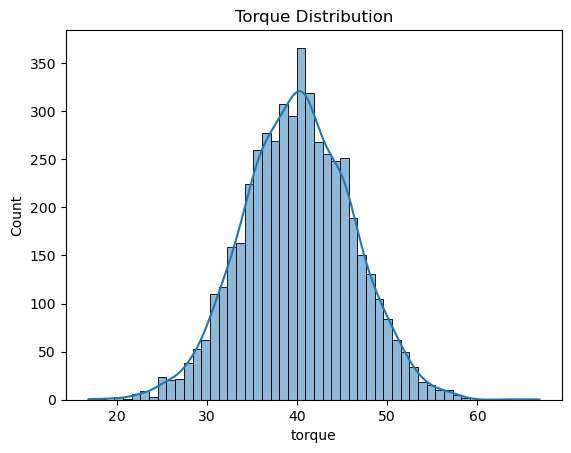




------------------------------------------------------------------------------------------------------------------------------------------------------





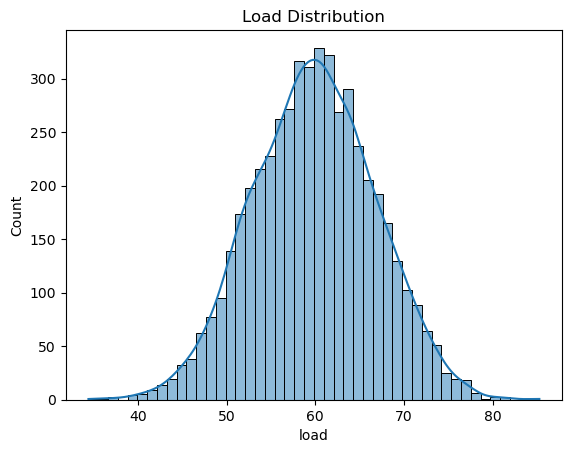

In [9]:
#univariant plot 



# vibration distributio

sns.histplot(df['vibration'],kde=True)
plt.title("Vibration Distribution")
plt.savefig("Vibration Distribution")
plt.show()

print("\n\n\n" + "-" * 150 + "\n\n\n")

#Temprature Distribution

sns.histplot(df['temperature'],kde=True)
plt.title("Temperature Distribution")
plt.savefig("Temperature Distribution")
plt.show()

print("\n\n\n" + "-" * 150 + "\n\n\n")

#Pressure Distribution

sns.histplot(df['pressure'],kde=True)
plt.title("pressure Distribution")
plt.savefig("pressure Distribution")
plt.show()

print("\n\n\n" + "-" * 150 + "\n\n\n")

#Torque Distribution

sns.histplot(df['torque'],kde=True)
plt.title("Torque Distribution")
plt.savefig("Torque Distribution")
plt.show()


print("\n\n\n" + "-" * 150 + "\n\n\n")

#Load Distribution

sns.histplot(df['load'],kde=True)
plt.title("Load Distribution")
plt.savefig("Load Distribution")
plt.show()


Correlation Matrix:              vibration  temperature  pressure    torque      load   failure  \
vibration     1.000000     0.493254  0.394183  0.003028  0.010642  0.213260   
temperature   0.493254     1.000000  0.364916 -0.013623 -0.012323  0.199012   
pressure      0.394183     0.364916  1.000000  0.009153  0.011152  0.174179   
torque        0.003028    -0.013623  0.009153  1.000000 -0.035551 -0.009983   
load          0.010642    -0.012323  0.011152 -0.035551  1.000000  0.010666   
failure       0.213260     0.199012  0.174179 -0.009983  0.010666  1.000000   
year               NaN          NaN       NaN       NaN       NaN       NaN   
month              NaN          NaN       NaN       NaN       NaN       NaN   
day          -0.013698     0.030104  0.036900  0.006842 -0.000936  0.007584   
hour         -0.006389    -0.019219 -0.011674 -0.006624  0.003846 -0.008436   
FailureFlag   0.213260     0.199012  0.174179 -0.009983  0.010666  1.000000   

             year  month      

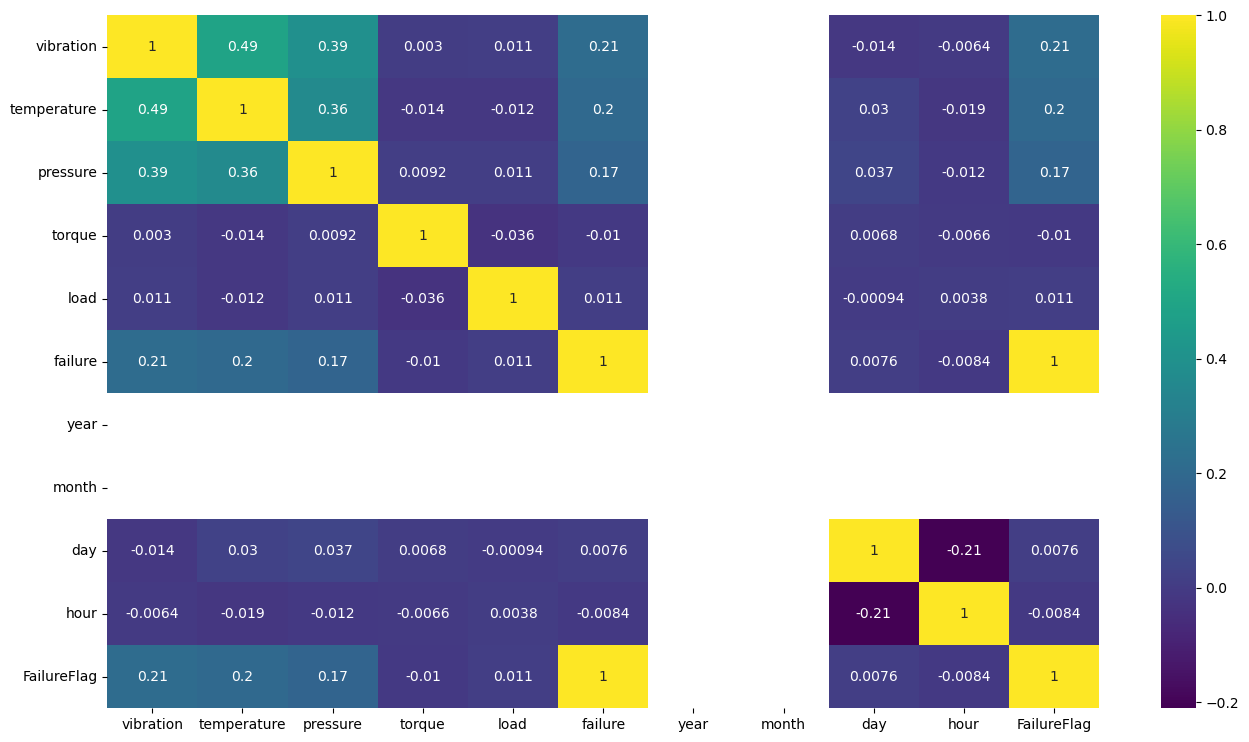

In [10]:
corr=df.corr(numeric_only=True)
print("\nCorrelation Matrix:",corr)

plt.figure(figsize=(16,9))
print("\ncorreletion HeatMap\n")
sns.heatmap(corr,annot=True,cmap="viridis")
plt.savefig("heatmap corr")
plt.show()


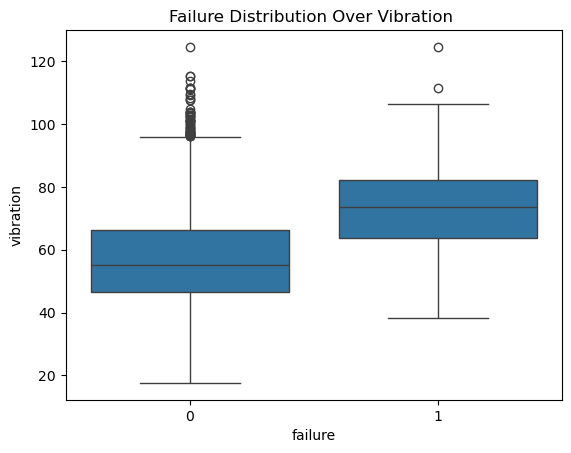




------------------------------------------------------------------------------------------------------------------------------------------------------





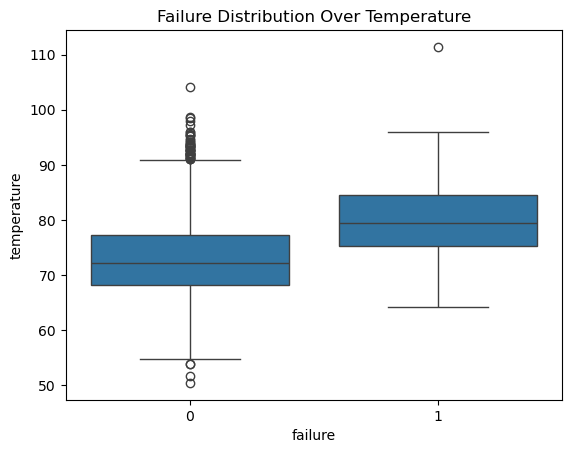




------------------------------------------------------------------------------------------------------------------------------------------------------





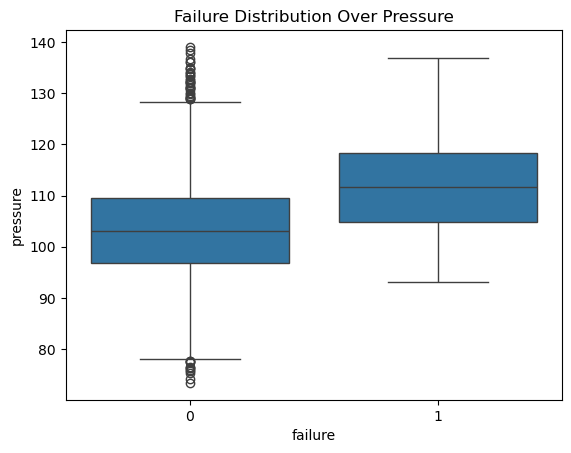




------------------------------------------------------------------------------------------------------------------------------------------------------





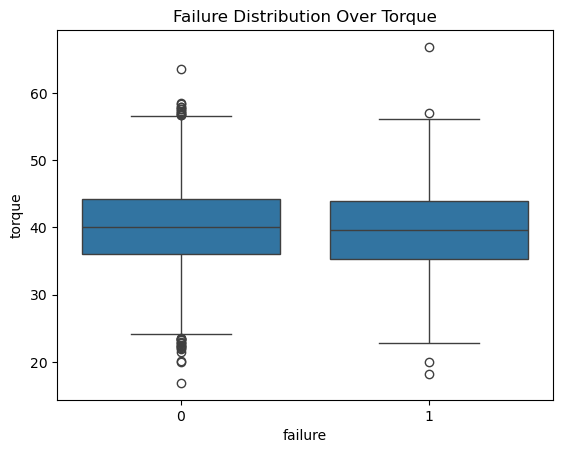




------------------------------------------------------------------------------------------------------------------------------------------------------





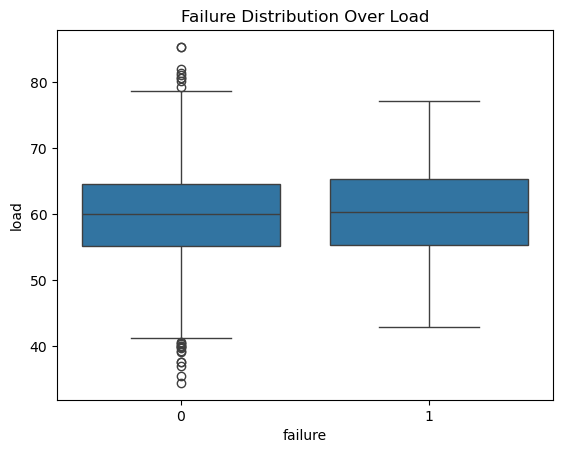

In [11]:
#Variable comparison with failiure

#vibration

sns.boxplot(data=df,x="failure",y="vibration")
plt.title("Failure Distribution Over Vibration ")
plt.savefig("Failure Distribution Over Vibration")
plt.show()

print("\n\n\n" + "-" * 150 + "\n\n\n")

#temperature

sns.boxplot(data=df,x="failure",y="temperature")
plt.title("Failure Distribution Over Temperature")
plt.savefig("Failure Distribution Over Temperature")
plt.show()

print("\n\n\n" + "-" * 150 + "\n\n\n")

#pressure

sns.boxplot(data=df,x="failure",y="pressure")
plt.title("Failure Distribution Over Pressure")
plt.savefig("Failure Distribution Over Pressure")
plt.show()

print("\n\n\n" + "-" * 150 + "\n\n\n")

#torque

sns.boxplot(data=df,x="failure",y="torque")
plt.title("Failure Distribution Over Torque")
plt.savefig("Failure Distribution Over Torque")
plt.show()

print("\n\n\n" + "-" * 150 + "\n\n\n")

#load

sns.boxplot(data=df,x="failure",y="load")
plt.title("Failure Distribution Over Load")
plt.savefig("Failure Distribution Over Load")
plt.show()

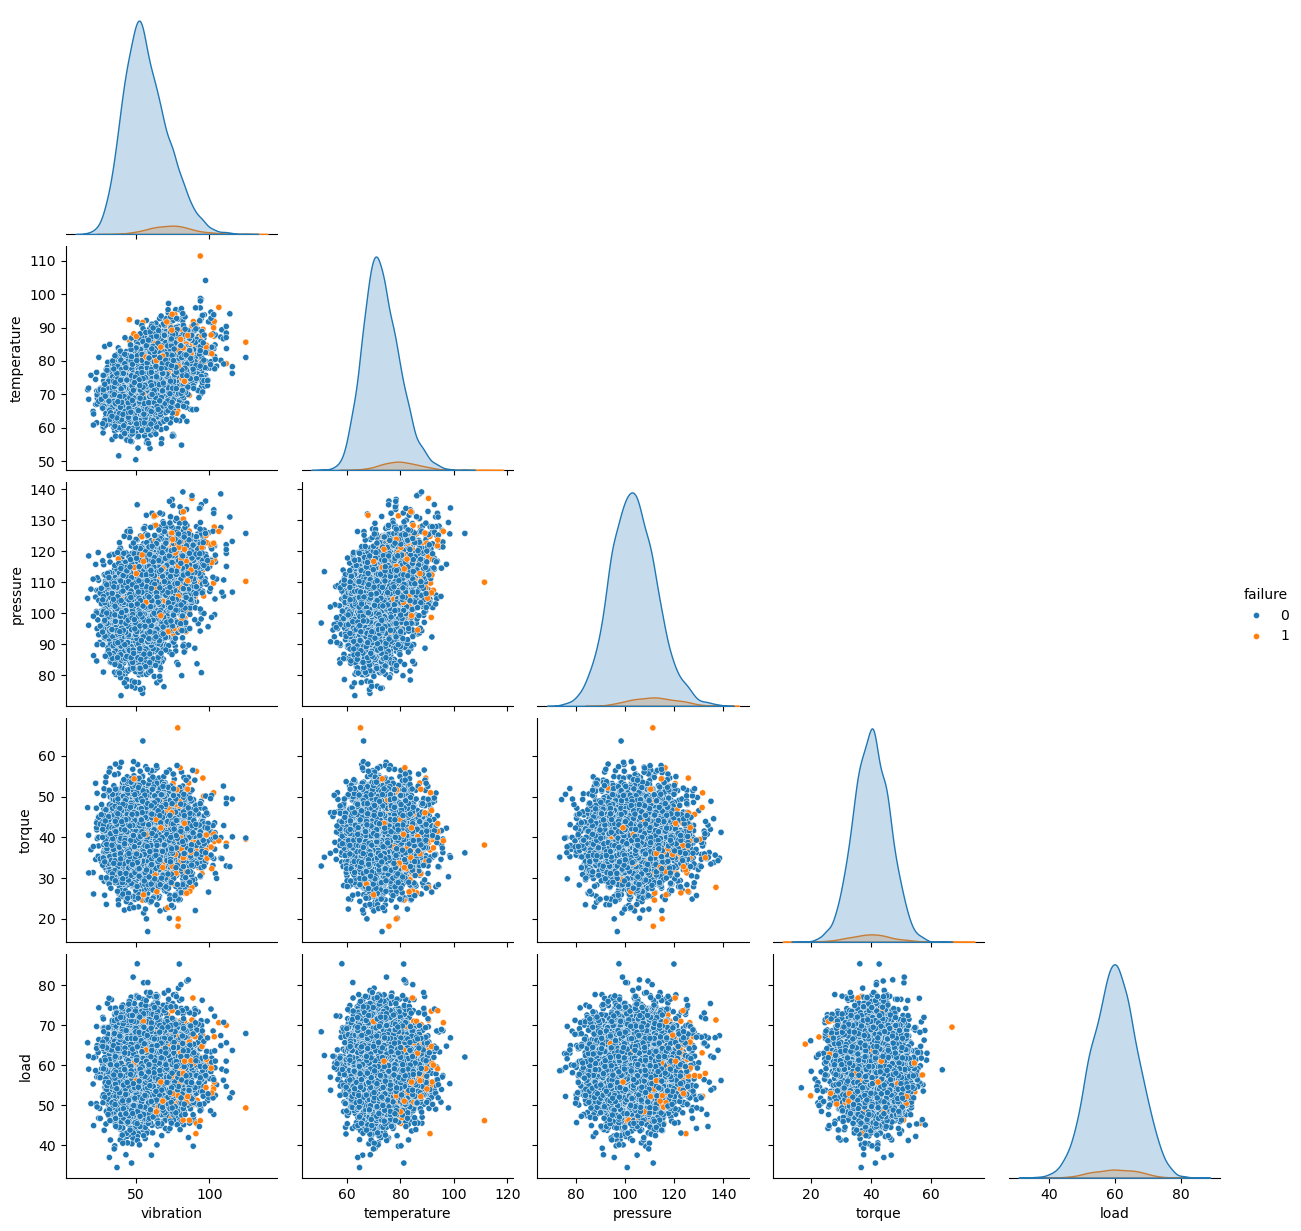

In [12]:
sns.pairplot(df[['vibration','temperature','pressure','torque','load','failure']], hue='failure', plot_kws={'s': 20},corner=True)
plt.savefig("pair plot")
plt.show()


In [38]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


from sklearn.ensemble import RandomForestClassifier


In [17]:
df.drop(["timestamp"],axis=1,inplace=True)

In [18]:
df.drop(["FailureFlag"],axis=1,inplace=True)

In [19]:
df.dtypes

vibration      float64
temperature    float64
pressure       float64
torque         float64
load           float64
failure          int64
year             int32
month            int32
day              int32
hour             int32
dtype: object

# logistic regression

In [54]:

x = df.drop("failure",axis=1)
y = df["failure"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [57]:
model = LogisticRegression(max_iter=1000,class_weight ="balanced")
model.fit(x_train,y_train)
prediction =model.predict(x_test)

In [58]:
model.classes_

array([0, 1])

In [59]:
print (confusion_matrix(y_test,prediction))

[[710 251]
 [  7  32]]


In [53]:
model.predict_proba(x_test)

array([[0.99128385, 0.00871615],
       [0.9918004 , 0.0081996 ],
       [0.97605245, 0.02394755],
       ...,
       [0.89342159, 0.10657841],
       [0.98855962, 0.01144038],
       [0.9856669 , 0.0143331 ]])

In [60]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       961
           1       0.11      0.82      0.20        39

    accuracy                           0.74      1000
   macro avg       0.55      0.78      0.52      1000
weighted avg       0.96      0.74      0.82      1000



In [129]:
prediction = model.predict([[88.907663,76.02110,102.021104,46.681169,49.569421,0,1,1,0]])
print(prediction)

[0]


# Random Forest Classifier

In [85]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [100]:
model = RandomForestClassifier(n_estimators =100, random_state=42, class_weight='balanced')
model.fit(x_train,y_train)
prediction = model.predict(x_test)


In [102]:
model.classes_

array([0, 1])

In [103]:
print (confusion_matrix(y_test,prediction))

[[961   0]
 [ 39   0]]


In [104]:
model.predict_proba(x_test)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       ...,
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.95, 0.05]])

In [105]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       961
           1       0.00      0.00      0.00        39

    accuracy                           0.96      1000
   macro avg       0.48      0.50      0.49      1000
weighted avg       0.92      0.96      0.94      1000



C:\Users\muham\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\muham\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\muham\Downloads\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [106]:
pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   -- ------------------------------------- 3.7/72.0 MB 26.5 MB/s eta 0:00:03
   ----- ---------------------------------- 10.2/72.0 MB 30.0 MB/s eta 0:00:03
   --------- ------------------------------ 16.8/72.0 MB 30.8 MB/s eta 0:00:02
   ------------- -------------------------- 24.1/72.0 MB 31.7 MB/s eta 0:00:02
   ----------------- ---------------------- 31.2/72.0 MB 32.1 MB/s eta 0:00:02
   ---------------------- ----------------- 39.8/72.0 MB 33.6 MB/s eta 0:00:01
   -------------------------- ------------- 47.2/72.0 MB 34.1 MB/s eta 0:00:01
   ------------------------------ --------- 55.3/72.0 MB 34.8 MB/s eta 0:00:01
   ---------------------------------- ----- 62.4/72.0 MB 35.3 MB/s eta 0:00:01
   -------------------------------------- - 69.5/72.0 MB 34.8 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 33.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packag

# Xboost

In [107]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
X = df.drop("failure", axis=1)
y = df["failure"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1,max_depth=5, scale_pos_weight=1, use_label_encoder=False, eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

C:\Users\muham\Downloads\anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:09:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [112]:
y_pred = model.predict(X_test)

In [113]:
print(confusion_matrix(y_test, y_pred))

[[959   2]
 [ 38   1]]


In [111]:

print(classification_report(y_test, y_pred))

[[959   2]
 [ 38   1]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       961
           1       0.33      0.03      0.05        39

    accuracy                           0.96      1000
   macro avg       0.65      0.51      0.51      1000
weighted avg       0.94      0.96      0.94      1000



In [122]:
sample = [[72.557878, 76.021108, 103.536157, 39.804065, 61.983265, 0, 1, 1, 0]]
prediction = model.predict(sample)
proba = model.predict_proba(sample)

print("Predicted Class:", prediction[0])
print("Failure Probability:", proba[0][1])

Predicted Class: 0
Failure Probability: 0.26477787
